# Load libraries

In [1]:
# Basic libraries
import pandas as pd
import numpy as np
import numpy.random as nr
import math
import scipy.stats as ss
import statsmodels.api as sm

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Machine Learning Models
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import sklearn.metrics as sklm
from sklearn import feature_selection as fs
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Load datasets

In [2]:
df1 = pd.read_csv('train_values_OL27nta.csv')
df2 = pd.read_csv('train_labels_DPetPH2.csv')
df = pd.concat([df1, df2], axis=1, join='outer')

In [3]:
df.head()

,row_id,county_code,state,population,renter_occupied_households,pct_renter_occupied,evictions,rent_burden,pct_white,pct_af_am,...,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,row_id,gross_rent
0,0,8e686a7,fb8cab1,3876.0,408.0,24.583,NaN,18.380,0.945945,0.010761,...,0.218,0.190,0.083250,0.327984,0.389168,0.199599,10.008982,9.752342,0,577
1,1,d1b5fc5,842bd12,10224.0,1166.0,28.346,3.0,26.694,0.808959,0.002284,...,0.290,0.077,0.099099,0.202202,0.302302,0.396396,14.482893,3.013219,1,844
2,2,19a463b,2b7da97,27023.0,2927.0,21.641,9.0,31.028,0.956621,0.005141,...,0.208,0.192,0.137725,0.387226,0.255489,0.219561,9.620346,10.873572,2,700
3,3,1711ab7,5029ed4,8735.0,1039.0,23.110,0.0,27.734,0.894835,0.000298,...,0.193,0.215,0.077154,0.308617,0.398798,0.215431,9.383225,10.870809,3,592
4,4,1eb4681,b795815,3681.0,365.0,21.985,2.0,19.673,0.923886,0.000496,...,0.222,0.230,0.092537,0.362189,0.346269,0.199005,9.543286,14.723926,4,444


In [4]:
# As we already concatenate two tables together, do not need id column anymore, row_id column will be removed 
# The dataset is to predict the gross rent for each county, so all the county_code in this dataset are unique, we can remove them. 
df.drop('county_code', axis=1, inplace=True)
df.drop('row_id', axis=1, inplace=True)
df.drop('state', axis=1, inplace=True)

In [5]:
df.describe()

,population,renter_occupied_households,pct_renter_occupied,evictions,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,...,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,gross_rent
count,1.562000e+03,1.562000e+03,1562.000000,1235.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,...,1560.000000,1560.000000,1560.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000
mean,1.083407e+05,1.490462e+04,28.525570,397.410526,28.537526,0.769045,0.088593,0.092012,0.018431,0.012709,...,0.499388,0.228672,0.167707,0.145666,0.346271,0.303030,0.205033,11.621356,10.415138,701.142125
std,3.745229e+05,6.255947e+04,8.121601,1522.801074,4.670467,0.203306,0.143505,0.141599,0.074762,0.026693,...,0.023933,0.034732,0.044555,0.067483,0.071152,0.052236,0.092001,2.756009,2.772070,192.883110
min,2.690000e+02,6.400000e+01,7.279000,-1.000000,9.909000,0.009547,0.000000,0.000000,0.000000,0.000000,...,0.314000,0.082000,0.036000,0.019000,0.074297,0.114458,0.064128,3.654080,0.961076,351.000000
25%,1.045275e+04,1.078250e+03,22.874000,3.000000,25.869000,0.649967,0.005523,0.018747,0.001201,0.002391,...,0.495000,0.208000,0.140000,0.094226,0.300601,0.269461,0.142142,10.014818,8.613691,578.000000
50%,2.528200e+04,2.754000e+03,27.199500,27.000000,28.768000,0.846542,0.020599,0.037613,0.002610,0.005279,...,0.504000,0.227000,0.164000,0.129388,0.352176,0.303303,0.182365,11.435441,10.396898,650.000000
75%,6.836150e+04,7.987000e+03,32.341500,162.500000,31.307250,0.933479,0.102047,0.092998,0.006121,0.011886,...,0.511000,0.246000,0.191000,0.187719,0.396556,0.337672,0.241234,12.940235,12.250655,773.750000
max,1.002029e+07,1.760277e+06,73.008000,29251.000000,49.665000,0.995141,0.756011,0.987039,0.815817,0.418088,...,0.564000,0.415000,0.488000,0.535750,0.535536,0.477341,0.788153,29.034900,24.281150,1827.000000


# Data cleaning

In [6]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [7]:
missing_values_table(df)

Your selected dataframe has 43 columns.
There are 17 columns that have missing values.


,Missing Values,% of Total Values
homicides_per_100k,949,60.8
pct_excessive_drinking,462,29.6
evictions,327,20.9
pct_adult_smoking,218,14.0
motor_vehicle_crash_deaths_per_100k,190,12.2
pct_low_birthweight,116,7.4
pop_per_dentist,115,7.4
pop_per_primary_care_physician,114,7.3
air_pollution_particulate_matter_value,20,1.3
pct_below_18_years_of_age,2,0.1


In [8]:
#Drop the column with over 50% missing values
df=df.drop(columns=['homicides_per_100k'])

In [9]:
#Replace missing values with median for columns with missing values less than 50%
df['evictions'] = df['evictions'].replace(np.nan, df['evictions'].median())
df['pct_adult_smoking'] = df['pct_adult_smoking'].replace(np.nan, df['pct_adult_smoking'].median())
df['pct_excessive_drinking'] = df['pct_excessive_drinking'].replace(np.nan, df['pct_excessive_drinking'].median())
df['pct_low_birthweight'] = df['pct_low_birthweight'].replace(np.nan, df['pct_low_birthweight'].median())
df['motor_vehicle_crash_deaths_per_100k'] = df['motor_vehicle_crash_deaths_per_100k'].replace(np.nan, df['motor_vehicle_crash_deaths_per_100k'].median())
df['pop_per_dentist'] = df['pop_per_dentist'].replace(np.nan, df['pop_per_dentist'].median())
df['pop_per_primary_care_physician'] = df['pop_per_primary_care_physician'].replace(np.nan, df['pop_per_primary_care_physician'].median())
df['pct_uninsured_adults'] = df['pct_uninsured_adults'].replace(np.nan, df['pct_uninsured_adults'].median())
df['pct_uninsured_children'] = df['pct_uninsured_children'].replace(np.nan, df['pct_uninsured_children'].median())
df['pct_adult_obesity'] = df['pct_adult_obesity'].replace(np.nan, df['pct_adult_obesity'].median())
df['pct_diabetes'] = df['pct_diabetes'].replace(np.nan, df['pct_diabetes'].median())
df['pct_physical_inactivity'] = df['pct_physical_inactivity'].replace(np.nan, df['pct_physical_inactivity'].median())
df['air_pollution_particulate_matter_value'] = df['air_pollution_particulate_matter_value'].replace(np.nan, df['air_pollution_particulate_matter_value'].median())
df['pct_female'] = df['pct_female'].replace(np.nan, df['pct_female'].median())
df['pct_below_18_years_of_age'] = df['pct_below_18_years_of_age'].replace(np.nan, df['pct_below_18_years_of_age'].median())
df['pct_aged_65_years_and_older'] = df['pct_aged_65_years_and_older'].replace(np.nan, df['pct_aged_65_years_and_older'].median())

In [10]:
df.shape

(1562, 42)

# Exploratory Data Analysis

### Distribution of one variable

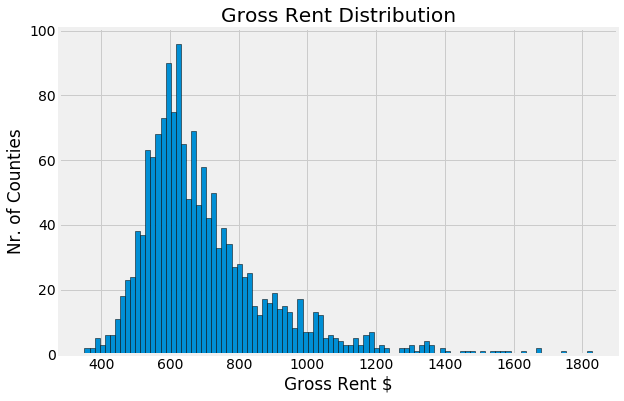

In [11]:
#Histgram of Gross Rent
plt.figure(figsize=(10, 6))
plt.style.use('fivethirtyeight')
plt.hist(df['gross_rent'], bins=100, ec='k')
plt.xlabel('Gross Rent $')
plt.ylabel('Nr. of Counties')
plt.title('Gross Rent Distribution')
plt.show()

The plot above reveals that the majority of the counties have the gross rent around 500 to 800 with the 600 as peak. There are some outliners like extreme expensive gross rent around 1800. We will look at the outliners later.

To contrast the Gross Rent, we can look at the rent burden, which is the median gross rent as a percentage of household income. Because the main reason of predicting the gross rent is to see how much financial pressure that people have to pay the rent.

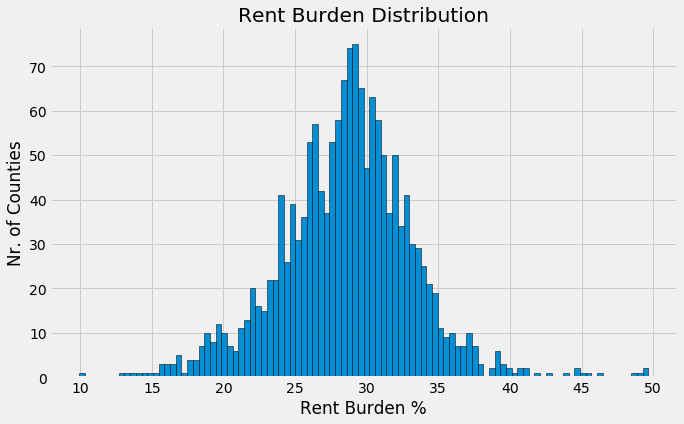

In [12]:
#Histgram of Gross Rent
plt.figure(figsize=(10, 6))
plt.style.use('fivethirtyeight')
plt.hist(df['rent_burden'], bins=100, ec='k')
plt.xlabel('Rent Burden %')
plt.ylabel('Nr. of Counties')
plt.title('Rent Burden Distribution')
plt.show()

The plot above for rent burden is normal distributed, with most of people paying around 30 percent of their income to renting a home.

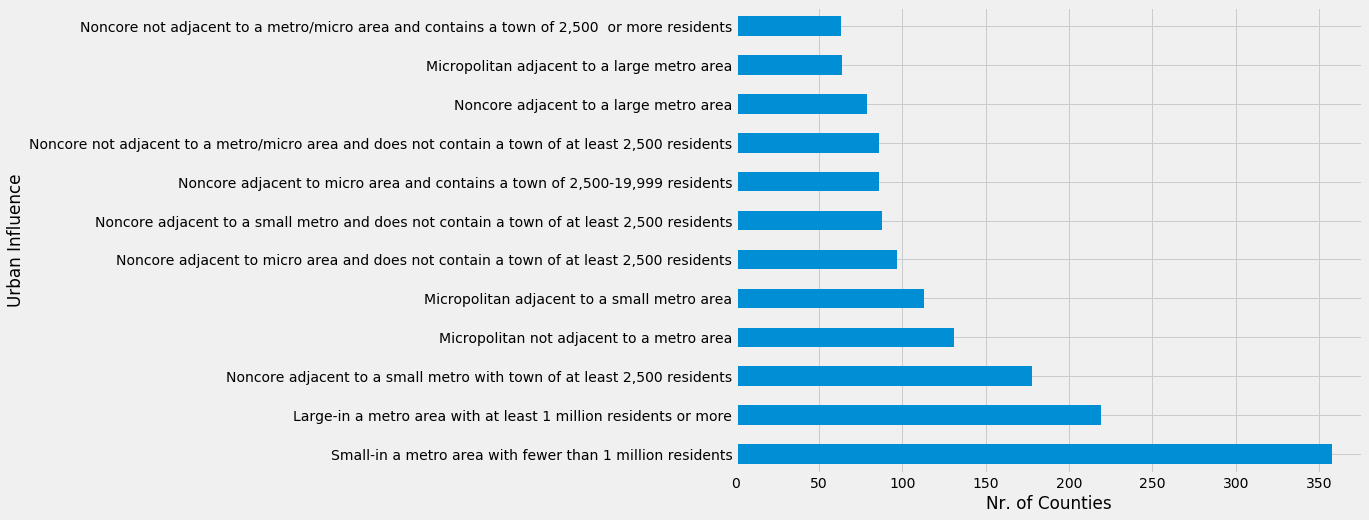

In [13]:
# Compare the urban_influence in counties
#Histgram of Gross Rent
counties = df['urban_influence'].value_counts()
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
counties.plot(kind='barh')
plt.xlabel('Nr. of Counties')
plt.ylabel('Urban Influence')
plt.show()

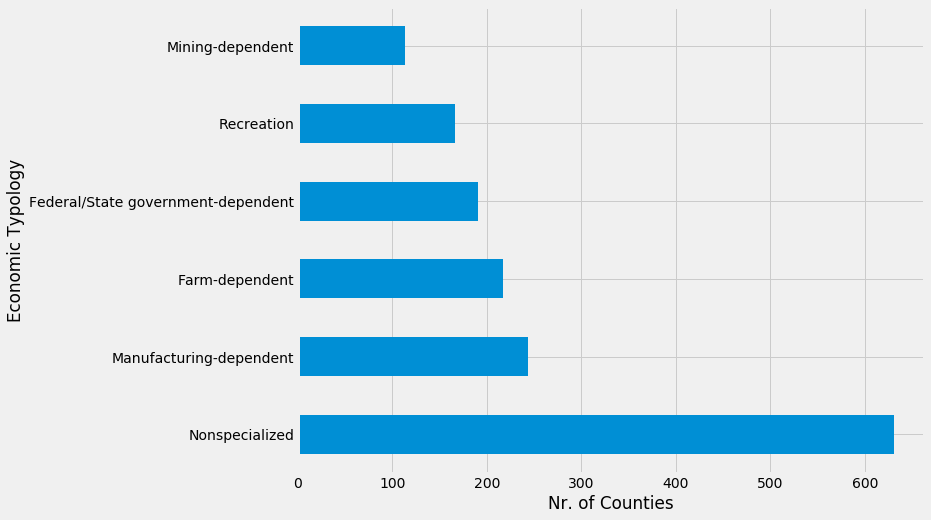

In [14]:
# Compare the economic typology
counties= df['economic_typology'].value_counts()
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
counties.plot(kind='barh')
plt.xlabel('Nr. of Counties')
plt.ylabel('Economic Typology')
plt.show()

### Relationship between two variables

In [15]:
# Create a list of economic dependence with more than 100 measurements
types = df.dropna(subset=['gross_rent'])
types = types['economic_typology'].value_counts()
types = list(types[types.values > 100].index)

Text(0.5, 1.0, 'Density Plot of Gross Rent by Economic Dependence Type')

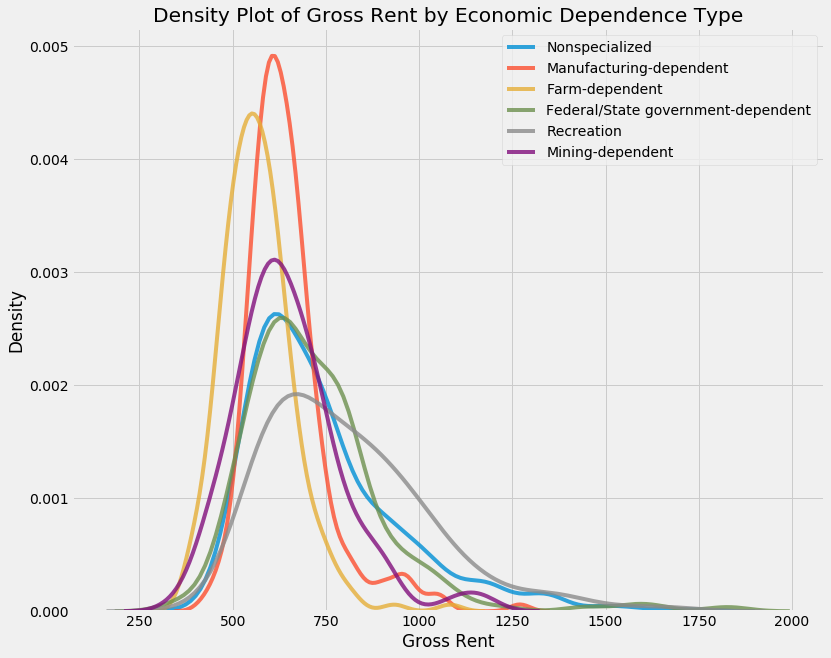

In [16]:
# Plot of distribution of scores for economic typology categories
fig = plt.figure(figsize=(12, 10))

# Plot each economic typology
for b_type in types:
    # Select the economic typology type
    subset = df[df['economic_typology'] == b_type]
    
    # Density plot of Gross Rent by Economic Dependence Type
    sns.kdeplot(subset['gross_rent'].dropna(),
               label = b_type, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Gross Rent'); plt.ylabel('Density')
plt.title('Density Plot of Gross Rent by Economic Dependence Type')

The graph above shows that people in Manufacturing-dependent, Farming-dependent and Mining-dependent industries tend to pay gross rent between 500 to 750. Whereas people from government, recreation and nonspecialized background tend to have higher range of gross rent.

In [17]:
# Create a list of urban influence with more than 100 measurements
influence_types = df.dropna(subset=['gross_rent'])
influence_types = influence_types['urban_influence'].value_counts()
influence_types = list(influence_types[influence_types.values > 100].index)

Text(0.5, 1.0, 'Density Plot of Gross Rent by Urban Influence Type')

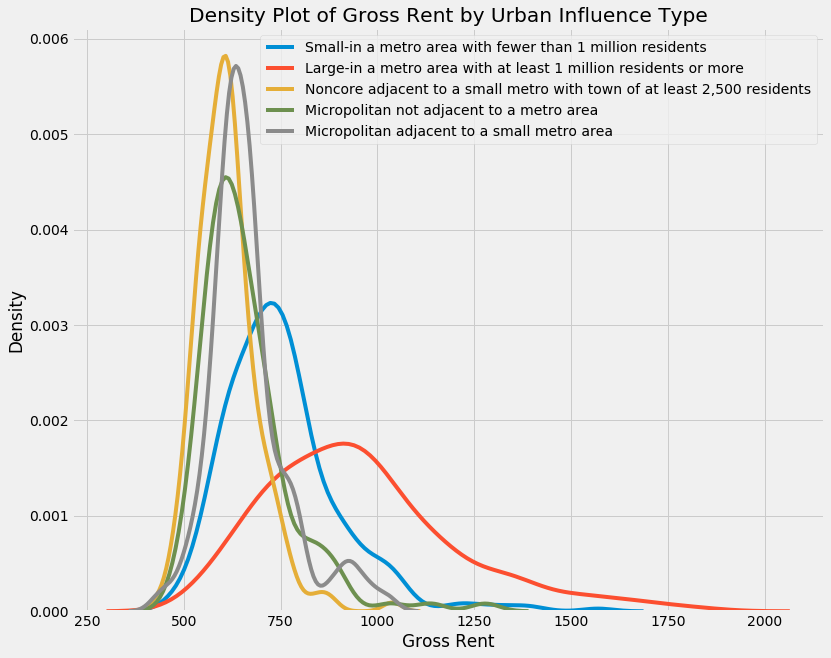

In [18]:
# Plot of distribution of scores for urban influence categories
fig = plt.figure(figsize=(12, 10))

# Plot each economic typology
for b_type in influence_types:
    # Select the urban influence type
    subset = df[df['urban_influence'] == b_type]
    
    # Density plot of Gross Rent
    sns.kdeplot(subset['gross_rent'].dropna(),
               label = b_type, shade = False);
    
# label the plot
plt.xlabel('Gross Rent'); plt.ylabel('Density')
plt.title('Density Plot of Gross Rent by Urban Influence Type')

The graph above shows that counties in noncore areas and micropolitan areas tend to pay gross rent between 500 to 750. Whereas counties in small and large metro areas tend to pay higher gross rent. The two graphes above also reavels that both economic-typology and urban influence impact the gross rent, so we need to keep these two categorical values.

### Correlations between features and target

In [19]:
df.corr()

,population,renter_occupied_households,pct_renter_occupied,evictions,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,...,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,gross_rent
population,1.000000,0.979015,0.285874,0.763193,0.162747,-0.233149,0.065498,0.194042,-0.047605,0.459903,...,0.102615,0.067645,-0.202788,-0.029638,-0.303886,-0.068912,0.295888,0.099957,-0.252709,0.398343
renter_occupied_households,0.979015,1.000000,0.320175,0.762670,0.146213,-0.227568,0.076058,0.176860,-0.040348,0.435849,...,0.092480,0.040808,-0.182354,-0.011385,-0.271734,-0.075980,0.261647,0.099201,-0.221893,0.345154
pct_renter_occupied,0.285874,0.320175,1.000000,0.288118,0.229203,-0.472168,0.283012,0.211543,0.140909,0.407788,...,0.026843,0.110914,-0.457253,0.103800,-0.372389,-0.076354,0.255215,0.319060,-0.320552,0.278613
evictions,0.763193,0.762670,0.288118,1.000000,0.128273,-0.228950,0.164462,0.119254,-0.039435,0.289347,...,0.117262,0.074443,-0.206524,-0.030329,-0.246811,-0.045933,0.239207,0.125148,-0.205856,0.251339
rent_burden,0.162747,0.146213,0.229203,0.128273,1.000000,-0.192858,0.336120,-0.015368,-0.144384,0.127979,...,0.175023,-0.180496,-0.115864,0.146306,-0.166862,-0.170873,0.118751,-0.116683,-0.056973,0.237213
pct_white,-0.233149,-0.227568,-0.472168,-0.228950,-0.192858,1.000000,-0.583318,-0.616874,-0.298028,-0.283322,...,0.087117,-0.338752,0.414424,-0.496270,0.297398,0.194806,0.023405,-0.385159,0.276071,-0.226985
pct_af_am,0.065498,0.076058,0.283012,0.164462,0.336120,-0.583318,1.000000,-0.112171,-0.106352,0.024738,...,0.104271,0.027938,-0.205939,0.354774,-0.017912,-0.263132,-0.096975,0.062403,0.019817,0.016147
pct_hispanic,0.194042,0.176860,0.211543,0.119254,-0.015368,-0.616874,-0.112171,1.000000,-0.036295,0.134626,...,-0.152546,0.311963,-0.217637,0.409152,-0.328434,-0.072550,-0.004915,0.313438,-0.267824,0.170457
pct_am_ind,-0.047605,-0.040348,0.140909,-0.039435,-0.144384,-0.298028,-0.106352,-0.036295,1.000000,0.027526,...,-0.116468,0.271419,-0.160051,-0.015299,0.032180,0.100959,-0.070987,0.284980,-0.095933,-0.017942
pct_asian,0.459903,0.435849,0.407788,0.289347,0.127979,-0.283322,0.024738,0.134626,0.027526,1.000000,...,-0.046081,-0.007988,-0.327677,-0.137763,-0.408269,-0.068936,0.455942,0.077162,-0.404801,0.592077


In [20]:
mask = np.zeros_like(df.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [21]:
# Find all correlations and sort 
correlations_data = df.corr()['gross_rent'].sort_values()

# Print the most negative correlations
print(correlations_data.head(5), '\n')

# Print the most positive correlations
print(correlations_data.tail(5))

pct_adults_with_high_school_diploma   -0.601540
death_rate_per_1k                     -0.589191
pct_physical_inactivity               -0.578691
pct_adult_obesity                     -0.470433
motor_vehicle_crash_deaths_per_100k   -0.458117
Name: gross_rent, dtype: float64 

renter_occupied_households        0.345154
population                        0.398343
pct_asian                         0.592077
pct_adults_bachelors_or_higher    0.679101
gross_rent                        1.000000
Name: gross_rent, dtype: float64


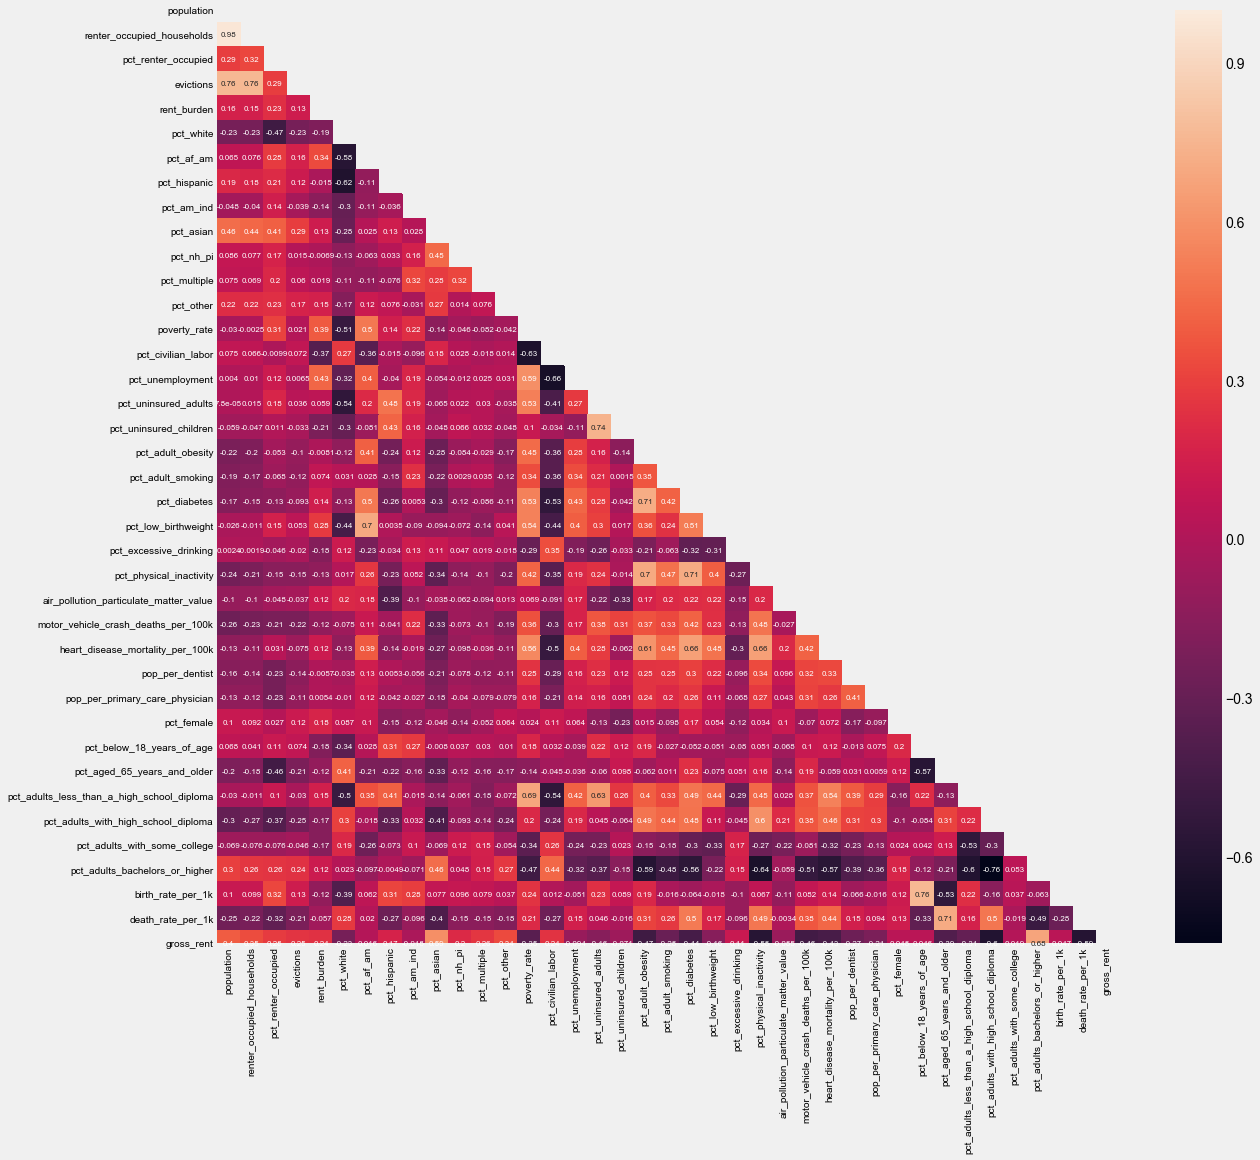

In [22]:
plt.figure(figsize=(18,16))
sns.heatmap(df.corr(), mask=mask, annot=True, annot_kws={"size": 8})
sns.set_style('white')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Things about pearson correlation to be aware of:
1. Highly correlated features (high multicolliearity) can be problematic, so we need to reduce one of the highly correlated features 
2. Knowing the strength and direction of the correlation can be helpful for finding the most important features, but correlation does not imply causation. So for the highly correlated features, we need to analyse further before removing it. 
3. Pearson correlation only valid for continuous values, does not work for categorical variables. 
4. Correlation only work for linea regression, so we need to look at correlation graph along with some other linear graph

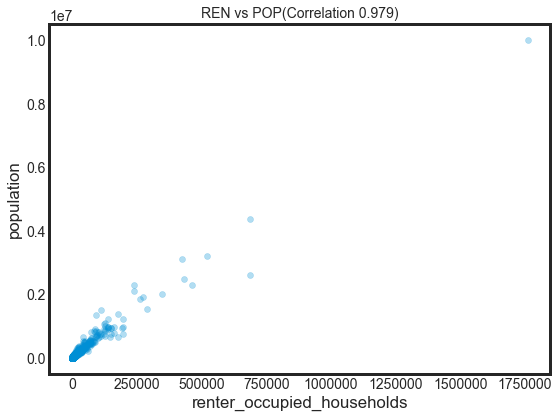

In [23]:
# Relationship between renter_occupied_households and population
ren_pop_corr = round(df['renter_occupied_households'].corr(df['population']), 3)
plt.figure(figsize=(8, 6))
plt.scatter(df['renter_occupied_households'], df['population'], alpha=0.3)
plt.title(f'REN vs POP(Correlation {ren_pop_corr})', fontsize=14)
plt.xlabel('renter_occupied_households')
plt.ylabel('population')
plt.show()

The graph above showed that renter_occupied_households and population do have strong correlation and linear regression, so one of the features (renter_occupied_households) will be removed 

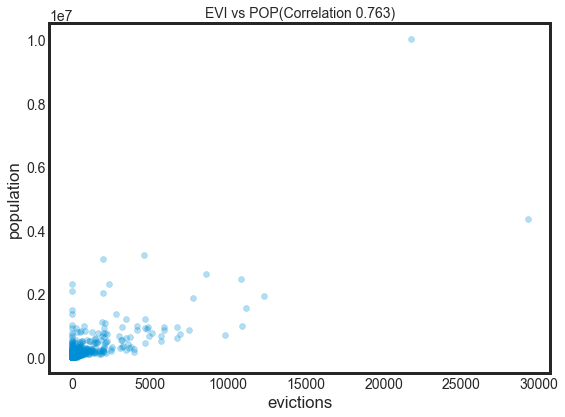

In [24]:
# Relationship between evictions and population
evi_pop_corr = round(df['evictions'].corr(df['population']), 3)
plt.figure(figsize=(8, 6))
plt.scatter(df['evictions'], df['population'], alpha=0.3)
plt.title(f'EVI vs POP(Correlation {evi_pop_corr})', fontsize=14)
plt.xlabel('evictions')
plt.ylabel('population')
plt.show()

C:\Users\Luna\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


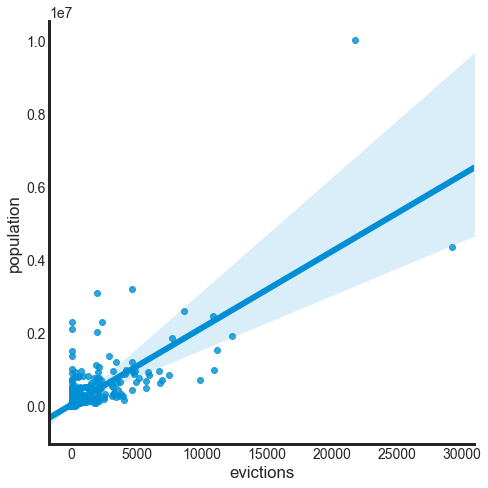

In [25]:
sns.lmplot(x='evictions', y='population', data=df, size=7)
plt.show()

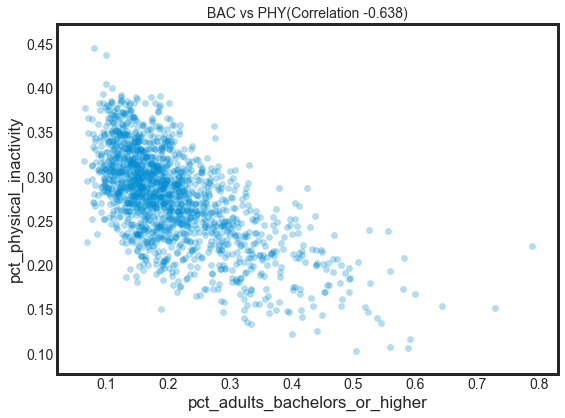

In [26]:
# Relationship between pct_adults_bachelors_higher and pct_adults_obesity
bac_phy_corr = round(df['pct_adults_bachelors_or_higher'].corr(df['pct_physical_inactivity']), 3)
plt.figure(figsize=(8, 6))
plt.scatter(df['pct_adults_bachelors_or_higher'], df['pct_physical_inactivity'], alpha=0.3)
plt.title(f'BAC vs PHY(Correlation {bac_phy_corr})', fontsize=14)
plt.xlabel('pct_adults_bachelors_or_higher')
plt.ylabel('pct_physical_inactivity')
plt.show()

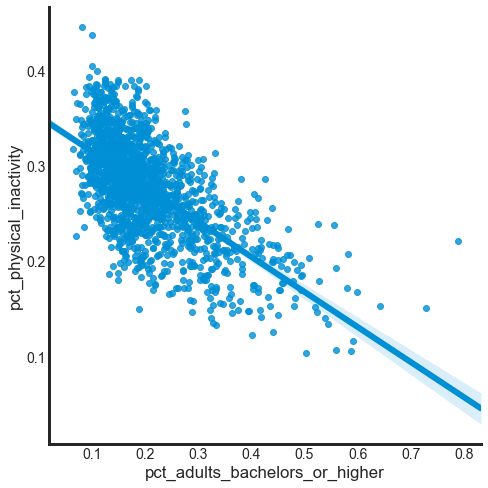

In [27]:
sns.lmplot(x='pct_adults_bachelors_or_higher', y='pct_physical_inactivity', data=df, size=7)
plt.show()

In [28]:
#%%time

#sns.pairplot(df)
#plt.show()

# Feature Engineering

### Encode categorical data and merge with numerical data

In [29]:
cal_df=df[['rucc', 'urban_influence', 'economic_typology']]
cal_df_encoded=pd.get_dummies(data=cal_df)

In [30]:
cal_df_encoded.shape

(1562, 27)

In [31]:
num_df=df[['population', 'renter_occupied_households', 'pct_renter_occupied', 'evictions', 'rent_burden', 'pct_white', 
            'pct_af_am', 'pct_hispanic', 'pct_am_ind', 'pct_asian', 'pct_nh_pi', 'pct_multiple', 'pct_other', 
            'poverty_rate', 'pct_civilian_labor', 'pct_unemployment', 'pct_uninsured_adults', 'pct_uninsured_children', 
           'pct_adult_obesity', 'pct_adult_smoking', 'pct_diabetes', 'pct_low_birthweight', 'pct_excessive_drinking', 
            'pct_physical_inactivity', 'air_pollution_particulate_matter_value', 'motor_vehicle_crash_deaths_per_100k', 
            'heart_disease_mortality_per_100k', 'pop_per_dentist', 'pop_per_primary_care_physician', 'pct_female', 
            'pct_below_18_years_of_age', 'pct_aged_65_years_and_older', 'pct_adults_less_than_a_high_school_diploma', 
            'pct_adults_with_high_school_diploma', 'pct_adults_with_some_college', 'pct_adults_bachelors_or_higher', 
            'birth_rate_per_1k', 'death_rate_per_1k']]

In [32]:
num_df.shape

(1562, 38)

In [33]:
features =pd.concat([cal_df_encoded, num_df], axis=1, join='outer')
features =features.dropna ()

In [34]:
features.head()

,rucc_Metro - Counties in metro areas of 1 million population or more,"rucc_Metro - Counties in metro areas of 250,000 to 1 million population","rucc_Metro - Counties in metro areas of fewer than 250,000 population","rucc_Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area","rucc_Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area","rucc_Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area","rucc_Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area","rucc_Nonmetro - Urban population of 20,000 or more, adjacent to a metro area","rucc_Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area",urban_influence_Large-in a metro area with at least 1 million residents or more,...,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k
0,0,0,0,0,1,0,0,0,0,0,...,1969.5,0.471,0.218,0.190,0.083250,0.327984,0.389168,0.199599,10.008982,9.752342
1,0,0,0,0,1,0,0,0,0,0,...,1690.0,0.472,0.290,0.077,0.099099,0.202202,0.302302,0.396396,14.482893,3.013219
2,0,0,0,0,0,0,1,0,0,0,...,1350.0,0.496,0.208,0.192,0.137725,0.387226,0.255489,0.219561,9.620346,10.873572
3,0,0,0,0,0,0,1,0,0,0,...,1749.0,0.503,0.193,0.215,0.077154,0.308617,0.398798,0.215431,9.383225,10.870809
4,0,0,0,0,1,0,0,0,0,0,...,1249.0,0.516,0.222,0.230,0.092537,0.362189,0.346269,0.199005,9.543286,14.723926


There are now 115 features, 77 dummy variables and 38 numerical variables

### Compare original gross rent with log gross rent

In [35]:
# Split training and test dataset
label = df['gross_rent']

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=10)

#Linear regression model
regr = LinearRegression()
regr.fit(X_train, y_train)

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Intercept 2091.30517159941


,coef
rucc_Metro - Counties in metro areas of 1 million population or more,53.627572
"rucc_Metro - Counties in metro areas of 250,000 to 1 million population",14.822187
"rucc_Metro - Counties in metro areas of fewer than 250,000 population",-0.983179
"rucc_Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area",-20.659741
"rucc_Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area",-19.547019
...,...
pct_adults_with_high_school_diploma,-102.913295
pct_adults_with_some_college,-192.423931
pct_adults_bachelors_or_higher,324.419037
birth_rate_per_1k,1.742814


In [36]:
# print out r-squared for training and test datasets
print('Training data r-squared: ', regr.score(X_train, y_train))
print('Teste data r-squared: ', regr.score(X_test, y_test))

Training data r-squared:  0.7925576160729471
Teste data r-squared:  0.7240505973217533


In [37]:
# Data transformation
df['gross_rent'].skew()

1.7314238292418713

In [38]:
y_log = np.log(df['gross_rent'])
y_log.tail()

1557    6.833032
1558    6.461468
1559    6.625392
1560    6.461468
1561    6.883463
Name: gross_rent, dtype: float64

In [39]:
y_log.skew()

0.7882462222675541

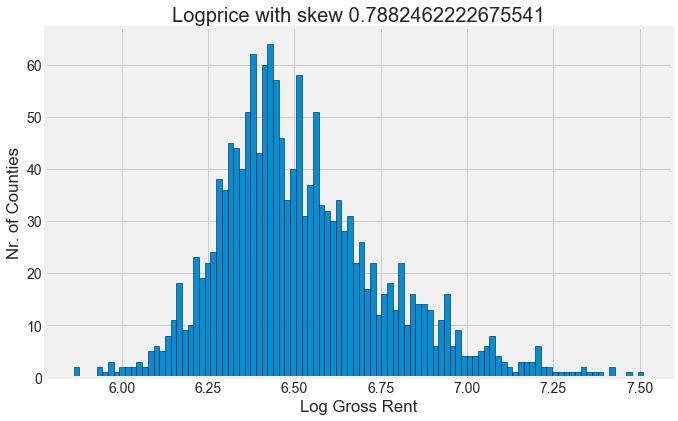

In [40]:
#Histgram of Gross Rent
plt.figure(figsize=(10, 6))
plt.style.use('fivethirtyeight')
plt.hist(y_log, bins=100, ec='k')
plt.xlabel('Log Gross Rent')
plt.ylabel('Nr. of Counties')
plt.title(f'Logprice with skew {y_log.skew()}')
plt.show()

In [41]:
# Regression using log gross rent
label=np.log(df['gross_rent']) #Use log prices

X_train, X_test, y_train, y_test = train_test_split(features, label, 
                                                    test_size=0.2, random_state=10)

regr=LinearRegression()
regr.fit(X_train, y_train)


print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Training data r-squared: 0.788242602734737
Test data r-squared: 0.7579177834872075
Intercept 7.938536054121016


,coef
rucc_Metro - Counties in metro areas of 1 million population or more,0.068999
"rucc_Metro - Counties in metro areas of 250,000 to 1 million population",0.029408
"rucc_Metro - Counties in metro areas of fewer than 250,000 population",0.001232
"rucc_Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area",-0.032473
"rucc_Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area",-0.044527
...,...
pct_adults_with_high_school_diploma,-0.104314
pct_adults_with_some_college,-0.162033
pct_adults_bachelors_or_higher,0.363721
birth_rate_per_1k,0.002996


Compare to the r squared that original gross rent generated, r-squared for training data reduced slightly for log gross rent, but it improved for test data. So we are going to use log gross rent for the following steps. 

# Feature selection

We have the coefs for each features does not mean that they have explanatory power and indicate the significance. So we need to find the p-value that reveal the feature significance. If the p-value is less that 0.05, the result is statistically significant. While the p-value larger than 0.05, the result is not statistically significant. 

### p values & evaluating coefficients

In [42]:
X_incl_const = sm.add_constant(X_train) # include the intercept in the training data

model =sm.OLS(y_train, X_incl_const) # OLS stands for Ordinary Lease Squares, just like sklearn, it gives us linear regression model
results=model.fit()

#results.params
#results.pvalues
p_values=pd.DataFrame({'coef': results.params, 'pvalue': round(results.pvalues, 3)}).sort_values('pvalue')

C:\Users\Luna\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [43]:
large_p_values= p_values[p_values['pvalue'] >= .05]

In [44]:
large_p_values

,coef,pvalue
air_pollution_particulate_matter_value,-0.005193,0.062
pct_excessive_drinking,-0.165912,0.064
pct_white,-0.525929,0.068
pct_diabetes,0.573062,0.080
pct_below_18_years_of_age,0.376053,0.094
pop_per_primary_care_physician,-0.000003,0.106
birth_rate_per_1k,0.002996,0.151
pct_am_ind,-0.398913,0.178
pct_hispanic,-0.385030,0.185
pop_per_dentist,0.000002,0.217


In [45]:
features_to_remove= large_p_values.index

In [46]:
selected_features= features.drop(columns=features_to_remove)

In [47]:
selected_features.shape

(1562, 47)

In [48]:
# Regression using log gross rent
label=np.log(df['gross_rent']) #Use log prices

X_train, X_test, y_train, y_test = train_test_split(selected_features, label, 
                                                    test_size=0.2, random_state=10)

regr=LinearRegression()
regr.fit(X_train, y_train)

print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Training data r-squared: 0.7608769891986245
Test data r-squared: 0.7150930519490497
Intercept 579213.1408546164


,coef
rucc_Metro - Counties in metro areas of 1 million population or more,2.454446e+03
"rucc_Metro - Counties in metro areas of 250,000 to 1 million population",-2.053889e+06
"rucc_Metro - Counties in metro areas of fewer than 250,000 population",-2.053889e+06
"rucc_Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area",-3.443948e+05
"rucc_Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area",-2.742041e+05
"rucc_Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area",-3.443947e+05
"rucc_Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area",-2.742041e+05
"rucc_Nonmetro - Urban population of 20,000 or more, adjacent to a metro area",-3.443947e+05
"rucc_Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area",-2.742041e+05
urban_influence_Large-in a metro area with at least 1 million residents or more,-5.816581e+05


After removing features with high p-value, there are 79 features left. The R square result for training and test data did not change much, but it reduced the problems caused by high multilinearity and reduced computing time. 

### Analyse and plot regression residuals

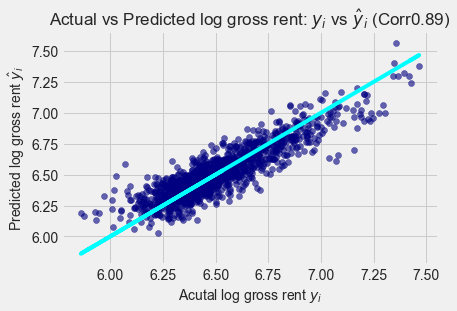

In [49]:
# Graph of Acutal vs Predicted Log Prices
corr =round(y_train.corr(results.fittedvalues), 2)
plt.scatter(x=y_train, y=results.fittedvalues, c='navy', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Acutal log gross rent $y _i$', fontsize=14)
plt.ylabel('Predicted log gross rent $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted log gross rent: $y _i$ vs $\hat y_i$ (Corr{corr})', fontsize=17)
plt.show()

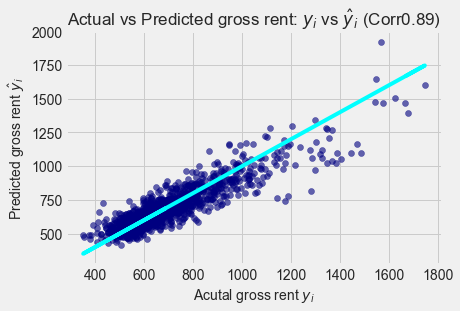

In [50]:
#Transform back to prices
plt.scatter(x=np.e**y_train, y=np.e**results.fittedvalues, c='navy', alpha=0.6)
plt.plot(np.e**y_train, np.e**y_train, color='cyan')

plt.xlabel('Acutal gross rent $y _i$', fontsize=14)
plt.ylabel('Predicted gross rent $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted gross rent: $y _i$ vs $\hat y_i$ (Corr{corr})', fontsize=17)
plt.show()

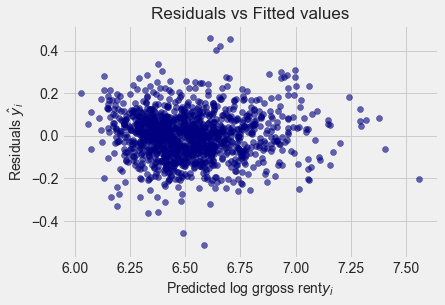

In [51]:
#Residuals vs Predicted values
plt.scatter(x=results.fittedvalues, y=results.resid, c='navy', alpha=0.6)


plt.xlabel('Predicted log grgoss rent$y _i$', fontsize=14)
plt.ylabel('Residuals $\hat y _i$', fontsize=14)
plt.title('Residuals vs Fitted values', fontsize=17)
plt.show()

The residual vs predicted values graph above looks pretty good, it is randomly distributed around the centre and without indicating outliners. 

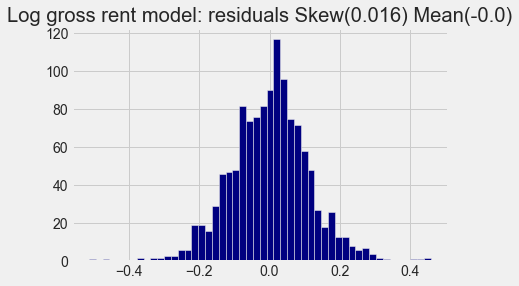

In [52]:
# Distribution of Residuals (log prices) -checking for normality
resid_mean=round(results.resid.mean(), 3)
resid_skew= round(results.resid.skew(), 3)

plt.hist(results.resid, bins=50, color='navy')
plt.title(f'Log gross rent model: residuals Skew({resid_skew}) Mean({resid_mean})')
plt.show()

# Models to Evaluate

We will compare five different machine learning models using the great Scikit-Learn library:

1. Linear Regression
2. Support Vector Machine Regression
3. Random Forest Regression
4. Gradient Boosting Regression
5. K-Nearest Neighbors Regression

In [53]:
# Function to calculate R square

def R2(y_true, y_pred):
    
    return sklm.r2_score(y_true, y_pred)

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_r2 = R2(y_test, model_pred)
    
    # Return the performance metric
    return model_r2

In [54]:
lr = LinearRegression()
lr_r2 = fit_and_evaluate(lr)

print('Linear Regression Performance on the test set: R2 = %0.4f' % lr_r2)

Linear Regression Performance on the test set: R2 = 0.7151


In [55]:
svm = SVR()
svm_r2 = fit_and_evaluate(svm)

print('Support Vector Machine Regression Performance on the test set: R2 = %0.4f' % svm_r2)

C:\Users\Luna\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Support Vector Machine Regression Performance on the test set: R2 = -0.0017


In [56]:
random_forest = RandomForestRegressor(random_state=60)
random_forest_r2 = fit_and_evaluate(random_forest)

print('Random Forest Regression Performance on the test set: R2 = %0.4f' % random_forest_r2)

Random Forest Regression Performance on the test set: R2 = 0.6896


C:\Users\Luna\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [57]:
gradient_boosted = GradientBoostingRegressor(random_state=60)
gradient_boosted_r2 = fit_and_evaluate(gradient_boosted)

print('Gradient Boosted Regression Performance on the test set: R2 = %0.4f' % gradient_boosted_r2)

Gradient Boosted Regression Performance on the test set: R2 = 0.7306


In [58]:
knn = KNeighborsRegressor(n_neighbors=10)
knn_r2 = fit_and_evaluate(knn)

print('K-Nearest Neighbors Regression Performance on the test set: R2 = %0.4f' % knn_r2)

K-Nearest Neighbors Regression Performance on the test set: R2 = 0.3160


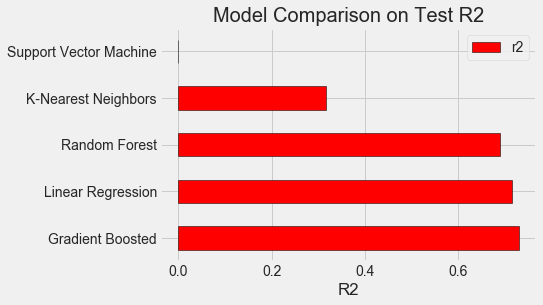

In [59]:
plt.style.use('fivethirtyeight')


# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression', 'Support Vector Machine',
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors'],
                                 'r2': [lr_r2, svm_r2, random_forest_r2, 
                                         gradient_boosted_r2, knn_r2]})

# Horizontal bar chart of test mae
model_comparison.sort_values('r2', ascending = False).plot(x = 'model', y = 'r2', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('R2'); plt.xticks(size = 14)
plt.title('Model Comparison on Test R2', size = 20);

In [60]:
# Prepare model
scaler= StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = LinearRegression()
model.fit(rescaledX, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Import validation dataset

In [61]:
##Import test data
validation_data_df=pd.read_csv('test_values_kWyIOM9.csv')

In [62]:
validation_data_df.head()

,row_id,county_code,state,population,renter_occupied_households,pct_renter_occupied,evictions,rent_burden,pct_white,pct_af_am,...,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k
0,0,8e7613e,9d1e27d,52842.0,5403.0,26.840,NaN,27.960,0.924234,0.025049,...,2710.0,0.512,0.215,0.177,0.174651,0.395210,0.274451,0.155689,9.828291,10.628268
1,1,694a5e8,a952566,212287.0,53502.0,57.534,6032.0,33.072,0.398318,0.484635,...,1009.0,0.522,0.192,0.113,0.168327,0.230080,0.241036,0.360558,13.285546,8.818293
2,2,b3f0726,20d32fc,81263.0,13368.0,39.994,1012.0,32.044,0.483789,0.381916,...,2459.0,0.526,0.240,0.153,0.201816,0.329970,0.287588,0.180626,11.571830,10.136089
3,3,fd922f0,1b0d913,122870.0,19359.0,41.865,NaN,30.724,0.468043,0.088393,...,1240.0,0.491,0.282,0.111,0.239563,0.277336,0.333996,0.149105,17.191860,10.089273
4,4,3bd551e,698ab34,146153.0,15766.0,30.681,644.0,30.860,0.651511,0.251317,...,2509.0,0.516,0.259,0.108,0.100100,0.289289,0.360360,0.250250,12.463880,6.432751


In [63]:
validation_data_df.shape

(1576, 45)

In [64]:
validation_data_df.drop('county_code', axis=1, inplace=True)
validation_data_df.drop('row_id', axis=1, inplace=True)
validation_data_df.drop('state', axis=1, inplace=True)

In [65]:
missing_values_table(validation_data_df)

Your selected dataframe has 42 columns.
There are 17 columns that have missing values.


,Missing Values,% of Total Values
homicides_per_100k,939,59.6
pct_excessive_drinking,457,29.0
evictions,313,19.9
pct_adult_smoking,215,13.6
motor_vehicle_crash_deaths_per_100k,177,11.2
pct_low_birthweight,110,7.0
pop_per_dentist,106,6.7
pop_per_primary_care_physician,91,5.8
air_pollution_particulate_matter_value,13,0.8
pct_below_18_years_of_age,3,0.2


In [66]:
#Drop the column with over 50% missing values
validation_data_df=validation_data_df.drop(columns=['homicides_per_100k'])

In [67]:
#Replace missing values with median for columns with missing values less than 50%
validation_data_df['evictions'] = validation_data_df['evictions'].replace(np.nan, validation_data_df['evictions'].median())
validation_data_df['pct_adult_smoking'] = validation_data_df['pct_adult_smoking'].replace(np.nan, validation_data_df['pct_adult_smoking'].median())
validation_data_df['pct_excessive_drinking'] = validation_data_df['pct_excessive_drinking'].replace(np.nan, validation_data_df['pct_excessive_drinking'].median())
validation_data_df['pct_low_birthweight'] = validation_data_df['pct_low_birthweight'].replace(np.nan, validation_data_df['pct_low_birthweight'].median())
validation_data_df['motor_vehicle_crash_deaths_per_100k'] = validation_data_df['motor_vehicle_crash_deaths_per_100k'].replace(np.nan, validation_data_df['motor_vehicle_crash_deaths_per_100k'].median())
validation_data_df['pop_per_dentist'] = validation_data_df['pop_per_dentist'].replace(np.nan, validation_data_df['pop_per_dentist'].median())
validation_data_df['pop_per_primary_care_physician'] = validation_data_df['pop_per_primary_care_physician'].replace(np.nan, validation_data_df['pop_per_primary_care_physician'].median())
validation_data_df['pct_uninsured_adults'] = validation_data_df['pct_uninsured_adults'].replace(np.nan, validation_data_df['pct_uninsured_adults'].median())
validation_data_df['pct_uninsured_children'] = validation_data_df['pct_uninsured_children'].replace(np.nan, validation_data_df['pct_uninsured_children'].median())
validation_data_df['pct_adult_obesity'] = validation_data_df['pct_adult_obesity'].replace(np.nan, validation_data_df['pct_adult_obesity'].median())
validation_data_df['pct_diabetes'] = validation_data_df['pct_diabetes'].replace(np.nan, validation_data_df['pct_diabetes'].median())
validation_data_df['pct_physical_inactivity'] = validation_data_df['pct_physical_inactivity'].replace(np.nan, validation_data_df['pct_physical_inactivity'].median())
validation_data_df['air_pollution_particulate_matter_value'] = validation_data_df['air_pollution_particulate_matter_value'].replace(np.nan, validation_data_df['air_pollution_particulate_matter_value'].median())
validation_data_df['pct_female'] = validation_data_df['pct_female'].replace(np.nan, validation_data_df['pct_female'].median())
validation_data_df['pct_below_18_years_of_age'] = validation_data_df['pct_below_18_years_of_age'].replace(np.nan, validation_data_df['pct_below_18_years_of_age'].median())
validation_data_df['pct_aged_65_years_and_older'] = validation_data_df['pct_aged_65_years_and_older'].replace(np.nan, validation_data_df['pct_aged_65_years_and_older'].median())

In [68]:
validation_cal_df=validation_data_df[['rucc', 'urban_influence', 'economic_typology']]
validation_cal_df_encoded=pd.get_dummies(data=validation_cal_df)
validation_cal_df_encoded.shape

(1576, 27)

In [69]:
validation_num_df=validation_data_df[['population', 'renter_occupied_households', 'pct_renter_occupied', 'evictions', 'rent_burden', 'pct_white', 
            'pct_af_am', 'pct_hispanic', 'pct_am_ind', 'pct_asian', 'pct_nh_pi', 'pct_multiple', 'pct_other', 
            'poverty_rate', 'pct_civilian_labor', 'pct_unemployment', 'pct_uninsured_adults', 'pct_uninsured_children', 
           'pct_adult_obesity', 'pct_adult_smoking', 'pct_diabetes', 'pct_low_birthweight', 'pct_excessive_drinking', 
            'pct_physical_inactivity', 'air_pollution_particulate_matter_value', 'motor_vehicle_crash_deaths_per_100k', 
            'heart_disease_mortality_per_100k', 'pop_per_dentist', 'pop_per_primary_care_physician', 'pct_female', 
            'pct_below_18_years_of_age', 'pct_aged_65_years_and_older', 'pct_adults_less_than_a_high_school_diploma', 
            'pct_adults_with_high_school_diploma', 'pct_adults_with_some_college', 'pct_adults_bachelors_or_higher', 
            'birth_rate_per_1k', 'death_rate_per_1k']]

In [70]:
validation_features =pd.concat([validation_cal_df_encoded, validation_num_df], axis=1, join='outer')
validation_features =validation_features.dropna ()

In [71]:
validation_features.head()

,rucc_Metro - Counties in metro areas of 1 million population or more,"rucc_Metro - Counties in metro areas of 250,000 to 1 million population","rucc_Metro - Counties in metro areas of fewer than 250,000 population","rucc_Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area","rucc_Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area","rucc_Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area","rucc_Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area","rucc_Nonmetro - Urban population of 20,000 or more, adjacent to a metro area","rucc_Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area",urban_influence_Large-in a metro area with at least 1 million residents or more,...,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k
0,0,0,1,0,0,0,0,0,0,0,...,2710.0,0.512,0.215,0.177,0.174651,0.395210,0.274451,0.155689,9.828291,10.628268
1,1,0,0,0,0,0,0,0,0,1,...,1009.0,0.522,0.192,0.113,0.168327,0.230080,0.241036,0.360558,13.285546,8.818293
2,0,0,0,0,0,0,0,1,0,0,...,2459.0,0.526,0.240,0.153,0.201816,0.329970,0.287588,0.180626,11.571830,10.136089
3,0,1,0,0,0,0,0,0,0,0,...,1240.0,0.491,0.282,0.111,0.239563,0.277336,0.333996,0.149105,17.191860,10.089273
4,0,1,0,0,0,0,0,0,0,0,...,2509.0,0.516,0.259,0.108,0.100100,0.289289,0.360360,0.250250,12.463880,6.432751


In [72]:
validation_selected_features= validation_features.drop(columns=features_to_remove)

In [73]:
validation_selected_features.shape

(1576, 47)

In [75]:
# transform the validation dataset
validation_data =np.array(validation_selected_features)
rescaledValidationX = scaler.transform(validation_data)
predictions = model.predict(rescaledValidationX)
predictions=np.e**predictions
print(predictions)

[ 637.92279517  804.14101364  686.68034141 ... 1143.14646691  719.45833961
  603.97005684]
